In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
import h5py
from os import listdir
from os.path import isfile, join

def get_results(model, exp_folder):
    
    
    onlyfiles = [f for f in listdir(f"./results/{model}/{exp_folder}") \
                 if isfile(join(f"./results/{model}/{exp_folder}", f))]
    glob_acc_lst = []
    train_loss_lst = []
    test_acc_lst = []
    test_loss_lst = []
    for file in onlyfiles:
        f = h5py.File(f'./results/{model}/{exp_folder}/{file}', 'r')
        print(file)
        glob_acc_lst.append(f['rs_glob_acc'][:])
        train_loss_lst.append(f['rs_train_loss'][:])
        test_loss_lst.append(f['rs_test_loss'][:])
        test_acc_lst.append(f['rs_test_acc'][:])
        f.close()
    return glob_acc_lst, train_loss_lst, test_acc_lst, test_loss_lst



In [4]:
def get_mu_std(lst):
    mu = np.array(lst).mean(axis=0)
    std = np.array(lst).std(axis=0)
    return mu, std

## MLP-MNIST

In [4]:
MLP_MNIST_Sophia = get_results('mlp', 'mnist-sophia')
MLP_MNIST_DONE = get_results('mlp', 'mnist-done')
MLP_MNIST_FedAvg = get_results('mlp', 'mnist-fedavg')

mlp_mnist_sophia_loss = MLP_MNIST_Sophia[-1]
mlp_mnist_sophia_acc = MLP_MNIST_Sophia[-2]

mlp_mnist_done_loss = MLP_MNIST_DONE[-1]
mlp_mnist_done_acc = MLP_MNIST_DONE[-2]

mlp_mnist_fedavg_loss = MLP_MNIST_FedAvg[-1]
mlp_mnist_fedavg_acc = MLP_MNIST_FedAvg[-2]

Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_0.h5
Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_4.h5
Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_2.h5
Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_3.h5
Mnist_Sophia_0.001_0.03_1.0_0.0005_32u_512b_10_1.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_2.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_0.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_1.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_4.h5
Mnist_DONE_1_0.008_0.1_0.02_32u_0b_80_3.h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_4(1).h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_2(1).h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_1(1).h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_0(1).h5
Mnist_FedAvg_0.01_0.03_0.01_0.02_32u_512b_10_3(1).h5


In [5]:
# mu/std for losses
mlp_mnist_sophia_loss_mu, mlp_mnist_sophia_loss_std = get_mu_std(mlp_mnist_sophia_loss)
mlp_mnist_done_loss_mu, mlp_mnist_done_loss_std = get_mu_std(mlp_mnist_done_loss)
mlp_mnist_fedavg_loss_mu, mlp_mnist_fedavg_loss_std = get_mu_std(mlp_mnist_fedavg_loss)

# mu/std for acc
mlp_mnist_sophia_acc_mu, mlp_mnist_sophia_acc_std = get_mu_std(mlp_mnist_sophia_acc)
mlp_mnist_done_acc_mu, mlp_mnist_done_acc_std = get_mu_std(mlp_mnist_done_acc)
mlp_mnist_fedavg_acc_mu, mlp_mnist_fedavg_acc_std = get_mu_std(mlp_mnist_fedavg_acc)



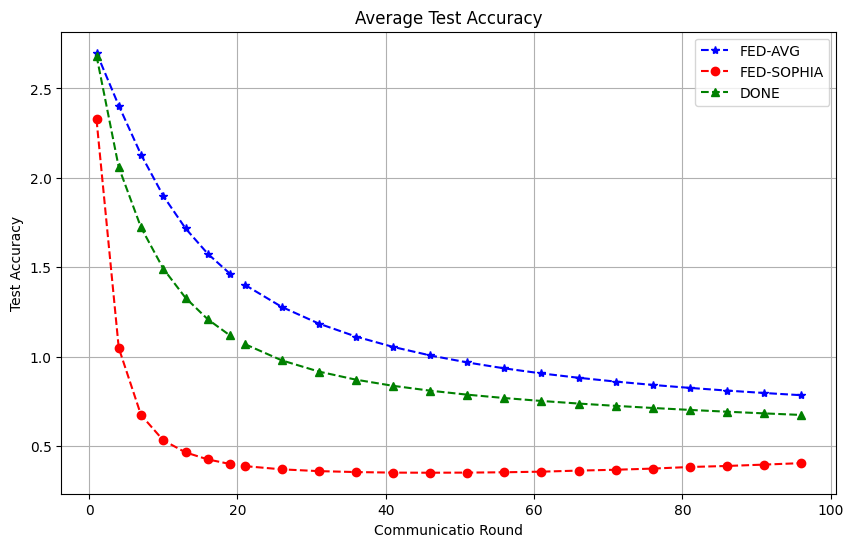

In [6]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [mlp_mnist_fedavg_loss_mu, mlp_mnist_sophia_loss_mu, mlp_mnist_done_loss_mu]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])



# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Accuracy')
ax.set_title('Average Test Accuracy')
ax.legend()
ax.grid(True)
# save plot
plt.savefig('test_loss_mlp_mnist.png')
# Display the plot
plt.show()


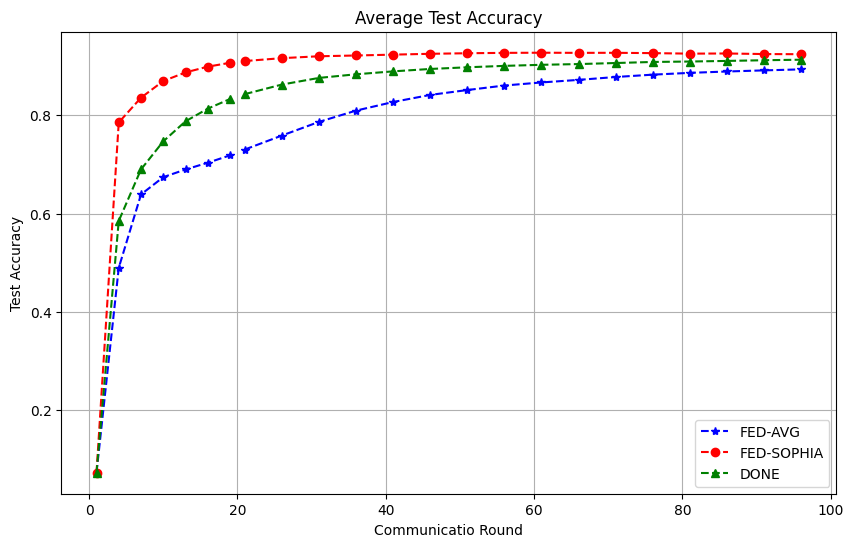

In [7]:
# same as above but for accuracy
fig, ax = plt.subplots(figsize=(10, 6))
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [mlp_mnist_fedavg_acc_mu, mlp_mnist_sophia_acc_mu, mlp_mnist_done_acc_mu]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])
    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Accuracy')
ax.set_title('Average Test Accuracy')
ax.legend()
ax.grid(True)
# save plot
plt.savefig('test_acc_mlp_mnist.png')
# Display the plot
plt.show()

## MLP-FMNIST

In [36]:
MLP_FMNIST_Sophia = get_results('mlp', 'fmnist-sophia')
MLP_FMNIST_DONE = get_results('mlp', 'fmnist-done')
MLP_FMNIST_FedAvg = get_results('mlp', 'fmnist-fedavg')

mlp_fmnist_sophia_loss = MLP_FMNIST_Sophia[-1]
mlp_fmnist_sophia_acc = MLP_FMNIST_Sophia[-2]

mlp_fmnist_done_loss = MLP_FMNIST_DONE[-1]
mlp_fmnist_done_acc = MLP_FMNIST_DONE[-2]

mlp_fmnist_fedavg_loss = MLP_FMNIST_FedAvg[-1]
mlp_fmnist_fedavg_acc = MLP_FMNIST_FedAvg[-2]


In [37]:
mlp_fmnist_sophia_loss_mu, mlp_fmnist_sophia_loss_std = get_mu_std(mlp_fmnist_sophia_loss)
mlp_fmnist_done_loss_mu, mlp_fmnist_done_loss_std = get_mu_std(mlp_fmnist_done_loss)
mlp_fmnist_fedavg_loss_mu, mlp_fmnist_fedavg_loss_std = get_mu_std(mlp_fmnist_fedavg_loss)

# mu/std for acc
mlp_fmnist_sophia_acc_mu, mlp_fmnist_sophia_acc_std = get_mu_std(mlp_fmnist_sophia_acc)
mlp_fmnist_done_acc_mu, mlp_fmnist_done_acc_std = get_mu_std(mlp_fmnist_done_acc)
mlp_fmnist_fedavg_acc_mu, mlp_fmnist_fedavg_acc_std = get_mu_std(mlp_fmnist_fedavg_acc)


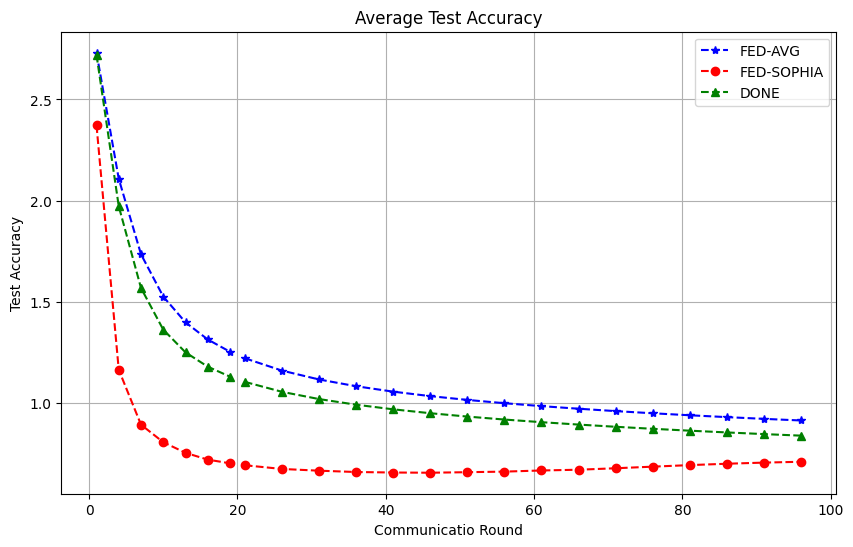

In [38]:
# plot loss
fig, ax = plt.subplots(figsize=(10, 6))
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [mlp_fmnist_fedavg_loss_mu, mlp_fmnist_sophia_loss_mu, mlp_fmnist_done_loss_mu]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])
    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Accuracy')
ax.set_title('Average Test Accuracy')
ax.legend()
ax.grid(True)
# save plot
plt.savefig('test_loss_mlp_fmnist.png')
# Display the plot
plt.show()


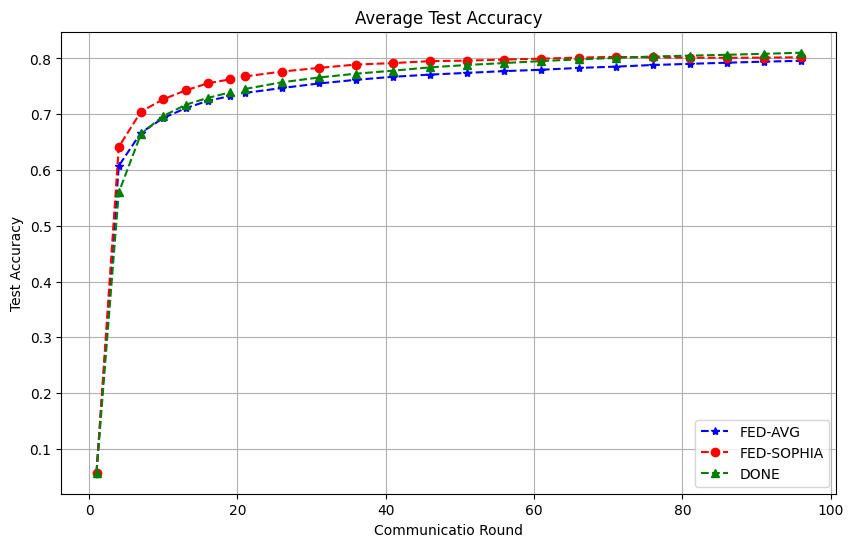

In [43]:
# plot acc
fig, ax = plt.subplots(figsize=(10, 6))
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [mlp_fmnist_fedavg_acc_mu, mlp_fmnist_sophia_acc_mu, mlp_fmnist_done_acc_mu]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])
    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Accuracy')
ax.set_title('Average Test Accuracy')
ax.legend()
ax.grid(True)
# save plot
plt.savefig('test_acc_mlp_fmnist.png')
# Display the plot
plt.show()


## CNN-MNIST


In [39]:
CNN_MNIST_Sophia = get_results('cnn', 'mnist-sophia')
CNN_MNIST_DONE = get_results('cnn', 'mnist-done')
CNN_MNIST_FedAvg = get_results('cnn', 'mnist-fedavg')

cnn_mnist_sophia_loss = CNN_MNIST_Sophia[-1]
cnn_mnist_sophia_acc = CNN_MNIST_Sophia[-2]

cnn_mnist_done_loss = CNN_MNIST_DONE[-1]
cnn_mnist_done_acc = CNN_MNIST_DONE[-2]

cnn_mnist_fedavg_loss = CNN_MNIST_FedAvg[-1]
cnn_mnist_fedavg_acc = CNN_MNIST_FedAvg[-2]


In [40]:
cnn_mnist_sophia_loss_mu, cnn_mnist_sophia_loss_std = get_mu_std(cnn_mnist_sophia_loss)
cnn_mnist_done_loss_mu, cnn_mnist_done_loss_std = get_mu_std(cnn_mnist_done_loss)
cnn_mnist_fedavg_loss_mu, cnn_mnist_fedavg_loss_std = get_mu_std(cnn_mnist_fedavg_loss)

# mu/std for acc
cnn_mnist_sophia_acc_mu, cnn_mnist_sophia_acc_std = get_mu_std(cnn_mnist_sophia_acc)
cnn_mnist_done_acc_mu, cnn_mnist_done_acc_std = get_mu_std(cnn_mnist_done_acc)
cnn_mnist_fedavg_acc_mu, cnn_mnist_fedavg_acc_std = get_mu_std(cnn_mnist_fedavg_acc)


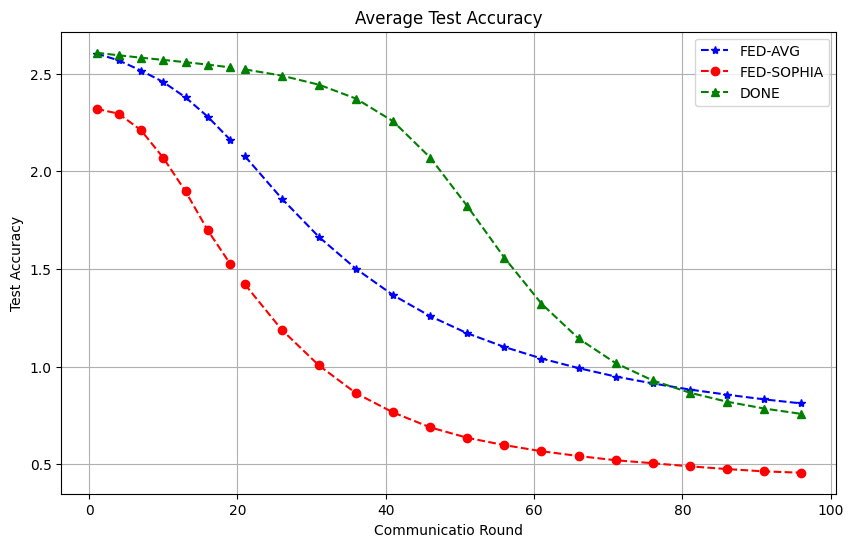

In [41]:
# plot loss
fig, ax = plt.subplots(figsize=(10, 6))
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [cnn_mnist_fedavg_loss_mu, cnn_mnist_sophia_loss_mu, cnn_mnist_done_loss_mu]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])
    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Accuracy')
ax.set_title('Average Test Accuracy')
ax.legend()
ax.grid(True)
# save plot
plt.savefig('test_loss_cnn_mnist.png')
# Display the plot
plt.show()


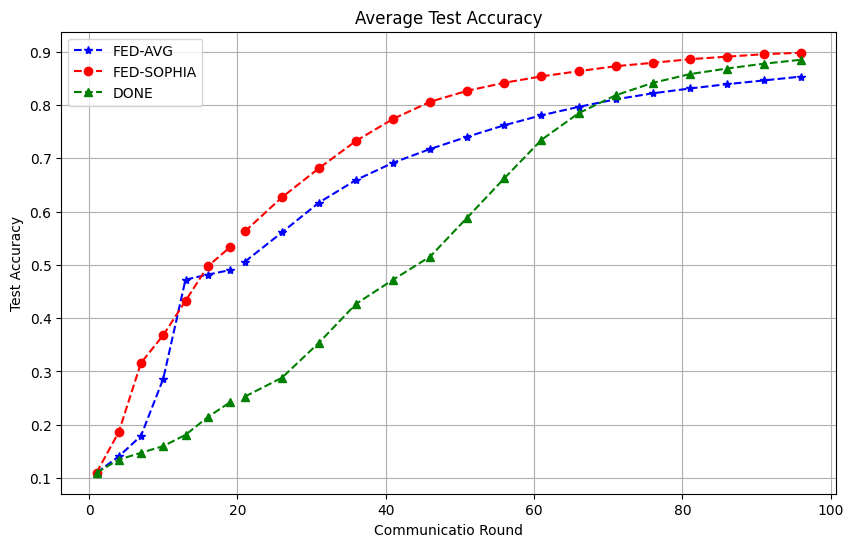

In [42]:
# plot accuracy
fig, ax = plt.subplots(figsize=(10, 6))
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['FED-AVG', 'FED-SOPHIA', 'DONE']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [cnn_mnist_fedavg_acc_mu, cnn_mnist_sophia_acc_mu, cnn_mnist_done_acc_mu]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])
    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Accuracy')
ax.set_title('Average Test Accuracy')
ax.legend()
ax.grid(True)
# save plot
plt.savefig('test_acc_cnn_mnist.png')
# Display the plot
plt.show()


## CNN-FMNIST

## LR effect

In [5]:
Sophia_lr = get_results('cnn', 'lr')

cnn_mnist_sophia_loss_lr_01 = Sophia_lr[-1][0]
cnn_mnist_sophia_acc_lr_01 = Sophia_lr[-2][0]

cnn_mnist_sophia_loss_lr_003 = Sophia_lr[-1][1]
cnn_mnist_sophia_acc_lr_003 = Sophia_lr[-2][1]

cnn_mnist_sophia_loss_lr_0005 = Sophia_lr[-1][2]
cnn_mnist_sophia_acc_lr_0005 = Sophia_lr[-2][2]


Fashion_Mnist_Sophia_0.01_0.03_1.0_0.001_32u_512b_10_0.h5
Fashion_Mnist_Sophia_0.003_0.03_1.0_0.001_32u_512b_10_0.h5
Fashion_Mnist_Sophia_0.0005_0.03_1.0_0.001_32u_512b_10_0.h5


In [9]:
cnn_mnist_sophia_acc_lr_01[-1]

0.7638105975197295

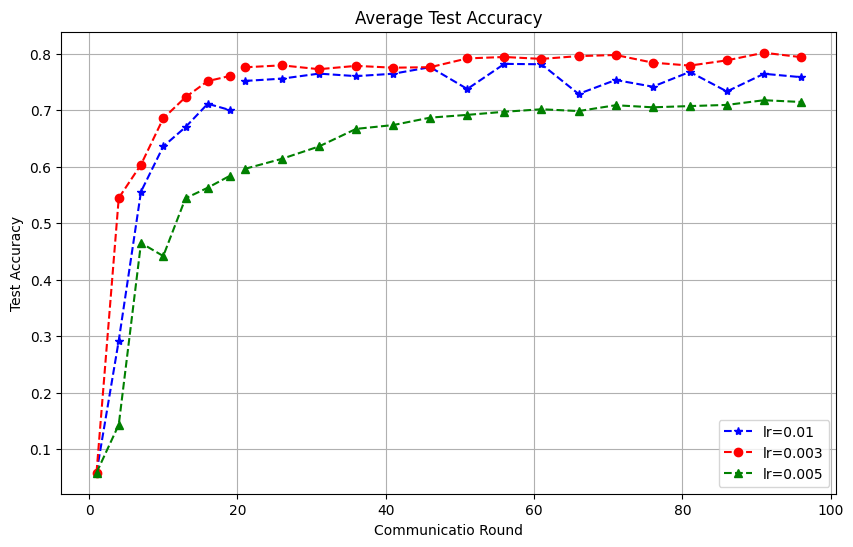

In [64]:
# plot accuracy(no averages this time just one run)
fig, ax = plt.subplots(figsize=(10, 6))
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['lr=0.01', 'lr=0.003', 'lr=0.005']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [cnn_mnist_sophia_acc_lr_01, cnn_mnist_sophia_acc_lr_003, cnn_mnist_sophia_acc_lr_0005]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])
    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Accuracy')
ax.set_title('Average Test Accuracy')
ax.legend()
ax.grid(True)
# save plot
plt.savefig('test_acc_cnn_mnist_lr.png')
# Display the plot
plt.show()


In [10]:
Sophia_epochs = get_results('cnn', 'epochs')

cnn_mnist_sophia_loss_epochs_5 = Sophia_epochs[-1][0]
cnn_mnist_sophia_acc_epochs_5 = Sophia_epochs[-2][0]

cnn_mnist_sophia_loss_epochs_1 = Sophia_epochs[-1][1]
cnn_mnist_sophia_acc_epochs_1 = Sophia_epochs[-2][1]

cnn_mnist_sophia_loss_epochs_10 = Sophia_epochs[-1][2]
cnn_mnist_sophia_acc_epochs_10 = Sophia_epochs[-2][2]



Fashion_Mnist_Sophia_0.001_0.03_1.0_0.001_32u_512b_5_0.h5
Fashion_Mnist_Sophia_0.001_0.03_1.0_0.001_32u_512b_1_0.h5
Fashion_Mnist_Sophia_0.001_0.03_1.0_0.001_32u_512b_10_0.h5


In [13]:
cnn_mnist_sophia_acc_epochs_5[-1]

0.7331595264937993

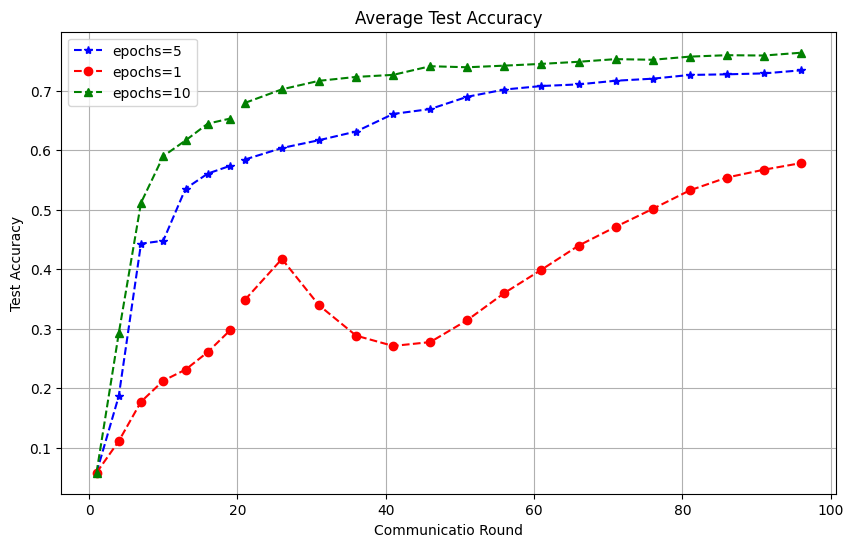

In [68]:
# plot accuracy(no averages this time just one run)
fig, ax = plt.subplots(figsize=(10, 6))
markers = ['*', 'o', '^']
line_styles = ['--', '--', '--']
colors = ['blue', 'red','green']
labels = ['epochs=5', 'epochs=1', 'epochs=10']
iterations = np.arange(1, 101)  # Assuming 100 iterations

avgs = [cnn_mnist_sophia_acc_epochs_5, cnn_mnist_sophia_acc_epochs_1, cnn_mnist_sophia_acc_epochs_10]

for i in range(3):
    ax.plot(iterations[:20:3], [avgs[i][j] for j in range(0, 20, 3)],\
        marker=markers[i], linestyle=line_styles[i], \
        color=colors[i])
    ax.plot(iterations[20::5], [avgs[i][j] for j in range(20, 100, 5)],\
        marker=markers[i], linestyle=line_styles[i],\
        color=colors[i], label=labels[i])
    

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Accuracy')
ax.set_title('Average Test Accuracy')
ax.legend()
ax.grid(True)
# save plot
plt.savefig('test_acc_cnn_mnist_epochs.png')
# Display the plot
plt.show()


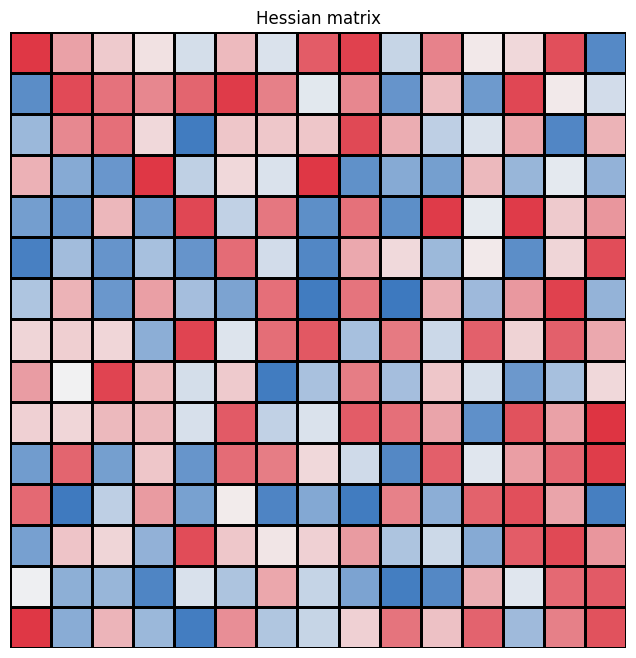

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a 15x15 matrix with random values for the diagonal
np.random.seed(0)  # For reproducibility
matrix_size = 15
matrix = np.random.rand(matrix_size, matrix_size)  # Initialize with random values
np.fill_diagonal(matrix, np.random.uniform(0.8, 1.0, size=matrix_size))  # Set diagonal values

# Create a custom colormap
cmap = sns.diverging_palette(250, 10, s=80, l=50, as_cmap=True)

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(matrix, cmap=cmap, cbar=False, square=True, linewidths=1, linecolor='black', annot=False)

# Remove axis labels and ticks
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

# Add a title
plt.title('Hessian matrix')

# Show the plot
plt.show()


In [122]:
import numpy as np

# Define the toy problem (loss function)
def toy_problem(theta):
    loss_theta1 = theta[0]**2  # Sharp curve in theta_1
    loss_theta2 = 0.1 * theta[1]**2  # Flat curve in theta_2
    return loss_theta1 + loss_theta2
# Gradient of the toy problem (for SGD)
def gradient(theta):
    return np.array([2 * (theta[0] - 2), 2 * (theta[1] - 3)])

# Initialize starting point
theta_start = np.array([0.0, 0.0])

# Learning rates for SGD and ADAM
learning_rate_sgd = 0.1
learning_rate_adam = 0.1


In [94]:
# Stochastic Gradient Descent (SGD)
def sgd(theta, lr):
    theta -= lr * gradient(theta)
    return theta

# ADAM optimization
def adam(theta, lr, beta1=0.9, beta2=0.999, epsilon=1e-7):
    m = v = 0
    t = 0
    while True:
        t += 1
        g = gradient(theta)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        theta -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        yield theta


def adam(theta, lr, beta1=0.9, beta2=0.999, epsilon=1e-7):
    m = v = 0
    t = 0
    while True:
        t += 1
        g = gradient(theta)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        theta -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        yield theta


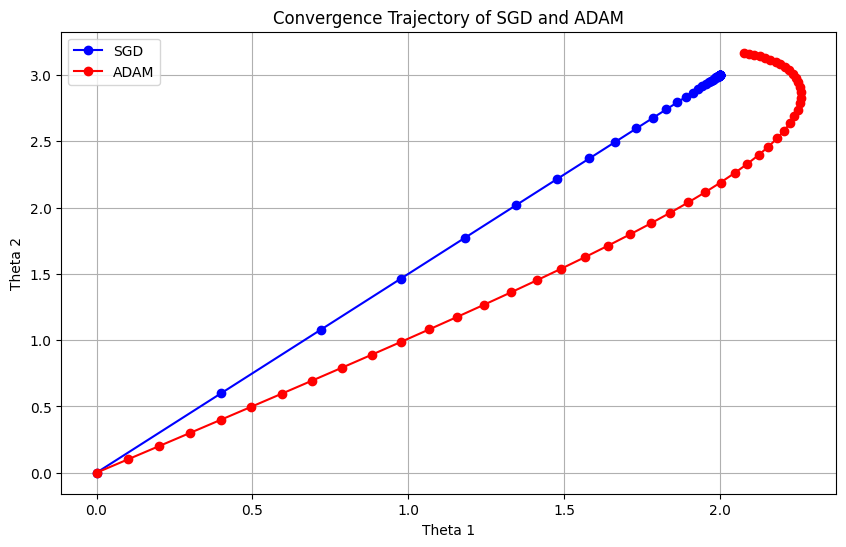

In [123]:
import matplotlib.pyplot as plt

# Number of iterations
num_iterations = 50

# Create lists to store the trajectory of optimization
sgd_trajectory = [theta_start.copy()]
adam_trajectory = [theta_start.copy()]
sophia_trajectory = [theta_start.copy()]

# SGD optimization process
theta_sgd = theta_start.copy()
for _ in range(num_iterations):
    theta_sgd = sgd(theta_sgd, learning_rate_sgd)
    sgd_trajectory.append(theta_sgd.copy())

# ADAM optimization process
theta_adam = theta_start.copy()
adam_optimization = adam(theta_adam, learning_rate_adam)
for _ in range(num_iterations):
    theta_adam = next(adam_optimization)
    adam_trajectory.append(theta_adam.copy())


theta_sophia = theta_start.copy()




# Convert the trajectory lists to NumPy arrays for plotting
sgd_trajectory = np.array(sgd_trajectory)
adam_trajectory = np.array(adam_trajectory)

# Plot the convergence trajectory
plt.figure(figsize=(10, 6))
plt.plot(sgd_trajectory[:, 0], sgd_trajectory[:, 1], marker='o', label='SGD', linestyle='-', color='b')
plt.plot(adam_trajectory[:, 0], adam_trajectory[:, 1], marker='o', label='ADAM', linestyle='-', color='r')
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.title('Convergence Trajectory of SGD and ADAM')
plt.legend()
plt.grid(True)
plt.show()


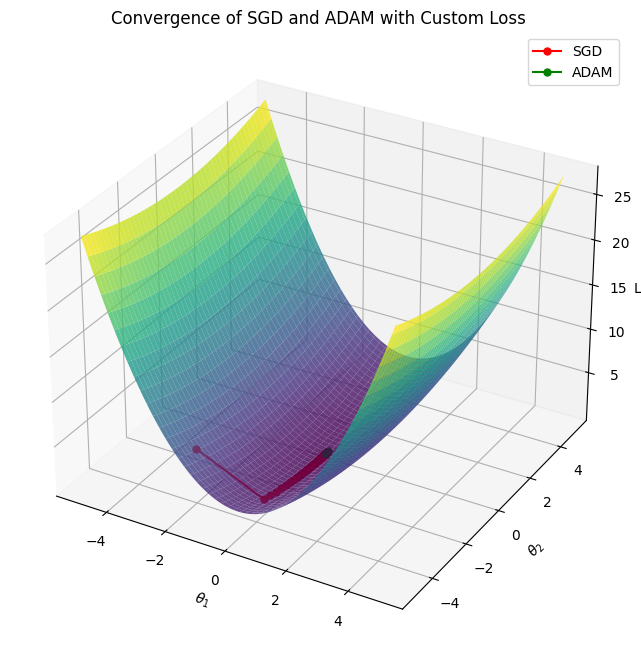

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a loss function with a sharp curve in theta_1 and a flat curve in theta_2
def custom_loss(theta):
    loss_theta1 = theta[0]**2  # Sharp curve in theta_1
    loss_theta2 = 0.1 * theta[1]**2  # Flat curve in theta_2
    return loss_theta1 + loss_theta2

# Create a mesh grid for visualization
theta1 = np.linspace(-5, 5, 100)
theta2 = np.linspace(-5, 5, 100)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
Z = np.zeros_like(Theta1)
for i in range(Theta1.shape[0]):
    for j in range(Theta1.shape[1]):
        Z[i, j] = custom_loss([Theta1[i, j], Theta2[i, j]])

# Set initial points for optimization
init_theta = [-2, -4]

# SGD optimization
sgd_lr = 0.5
sgd_iters = 50
sgd_path = [init_theta]
for i in range(sgd_iters):
    gradient = np.array([2 * init_theta[0], 0.2 * init_theta[1]])  # Gradient for custom_loss
    init_theta = init_theta - sgd_lr * gradient
    sgd_path.append(init_theta)
sgd_path = np.array(sgd_path)

# ADAM optimization
adam_iters = 50
adam_lr = 0.1
adam_path = [init_theta]
m = np.zeros(2)
v = np.zeros(2)
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
for i in range(adam_iters):
    gradient = np.array([2 * init_theta[0], 0.2 * init_theta[1]])  # Gradient for custom_loss
    m = beta1 * m + (1 - beta1) * gradient
    v = beta2 * v + (1 - beta2) * gradient**2
    m_hat = m / (1 - beta1**(i+1))
    v_hat = v / (1 - beta2**(i+1))
    init_theta = init_theta - adam_lr * m_hat / (np.sqrt(v_hat) + eps)
    adam_path.append(init_theta)
adam_path = np.array(adam_path)

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Theta1, Theta2, Z, cmap='viridis', alpha=0.8)
ax.plot(sgd_path[:, 0], sgd_path[:, 1], custom_loss(sgd_path.T), 'ro-', markersize=5, label='SGD')
ax.plot(adam_path[:, 0], adam_path[:, 1], custom_loss(adam_path.T), 'go-', markersize=5, label='ADAM')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_zlabel('Loss')
ax.set_title('Convergence of SGD and ADAM with Custom Loss')
ax.legend()

plt.show()


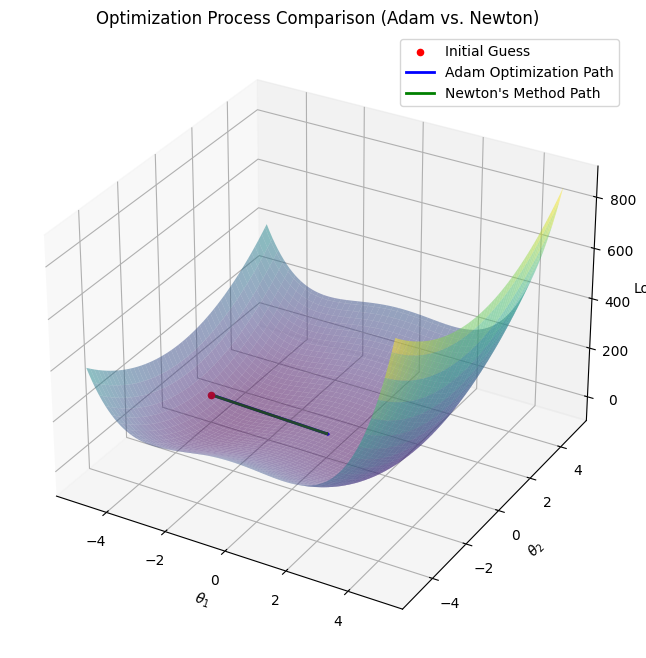

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

# Define the loss function
def loss_function(w, b):
    sharp_dim_loss = w**4 + 2*w**3 - 8*w**2 - 4*w
    flat_dim_loss = 8*b**2
    
    return sharp_dim_loss + flat_dim_loss

# Create a grid of w and b values
w_values = np.linspace(-5, 5, 100)
b_values = np.linspace(-5, 5, 100)
W, B = np.meshgrid(w_values, b_values)

# Calculate the loss for each combination of w and b
L = loss_function(W, B)

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the loss function surface with a lighter color
ax.plot_surface(W, B, L, cmap='viridis', alpha=0.5)

ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_zlabel('Loss')
ax.set_title('Optimization Process Comparison (Adam vs. Newton)')

# Initial guess
initial_theta1 = torch.tensor(-4.0, requires_grad=True)
initial_theta2 = torch.tensor(0.0, requires_grad=True)
initial_loss = loss_function(initial_theta1, initial_theta2)
ax.scatter(initial_theta1.item(), initial_theta2.item(), initial_loss.item(), c='red', marker='o', label='Initial Guess', depthshade=False)

# Lists to store the optimization paths
adam_theta1_path = [initial_theta1.item()]
adam_theta2_path = [initial_theta2.item()]
adam_loss_path = [initial_loss.item()]

newton_theta1_path = [initial_theta1.item()]
newton_theta2_path = [initial_theta2.item()]
newton_loss_path = [initial_loss.item()]

# Adam optimizer settings
adam_optimizer = torch.optim.Adam([initial_theta1, initial_theta2], lr=0.1)

# Newton's method settings
newton_learning_rate = 1.0

# Optimization process (Adam and Newton)
num_iterations = 20
for i in range(num_iterations):
    # Adam optimization
    current_loss = loss_function(initial_theta1, initial_theta2)
    adam_optimizer.zero_grad()
    current_loss.backward()
    adam_optimizer.step()
    
    adam_theta1_path.append(initial_theta1.item())
    adam_theta2_path.append(initial_theta2.item())
    adam_loss_path.append(current_loss.item())
    
    # Newton's method
    # Update using the Hessian matrix and gradients
    with torch.no_grad():
        gradient_theta1 = 2 * initial_theta1 + 2 * initial_theta2
        gradient_theta2 = 2 * initial_theta1 + 6 * initial_theta2
        hessian = torch.tensor([[2.0, 2.0], [2.0, 6.0]])
        step = torch.mm(torch.inverse(hessian), torch.tensor([[gradient_theta1], [gradient_theta2]]))
        initial_theta1 -= newton_learning_rate * step[0][0]
        initial_theta2 -= newton_learning_rate * step[1][0]
        current_loss = loss_function(initial_theta1, initial_theta2)
    
    newton_theta1_path.append(initial_theta1.item())
    newton_theta2_path.append(initial_theta2.item())
    newton_loss_path.append(current_loss.item())

# Connect the optimization paths with lines (Adam and Newton)
ax.plot(adam_theta1_path, adam_theta2_path, adam_loss_path, c='blue', label='Adam Optimization Path', linewidth=2)
ax.plot(newton_theta1_path, newton_theta2_path, newton_loss_path, c='green', label="Newton's Method Path", linewidth=2)

ax.legend()
plt.show()
